The following program uses Logistic Regression to predict the need for maintanence of a ship's engine based on sensor and settings data provided by the ship's monitoring system. The variable names and their brief description are as follows:

sensor_1 to sensor_21 are various sensors from a ship's engine.

RUL is the remaining number of cycles the engine has.

This model will predict if the ship requires maintanence based on the RUL.

If the RUL is less than 50, the MerryTime application will notify the ship's members that a pending maintenance is required.

In [114]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pickle

In [115]:
df = pd.read_csv('train_data.csv')

In [116]:
X = df.drop('RUL', axis=1)
y = df['RUL']
# Change all values in RUL column, if < 50, 'n' else 'y'
y = ['y' if x <= 50 else 'n' for x in y]

In [70]:
# def preprocess_data(X):
#     scaler = MinMaxScaler(feature_range = (0,1))
#     df_numeric = X.select_dtypes(include=[np.number])
#     numeric_cols = df_numeric.columns.values

#     for col in numeric_cols:
#         X[col] = scaler.fit_transform(X[[col]]) 
#     df_categorical = X.select_dtypes(exclude=[np.number])
#     categorical_cols = df_categorical.columns.values
#     X = pd.get_dummies(X,columns=categorical_cols)               
#     return X

In [71]:
X=X

In [117]:
X

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,25.0074,0.6200,60,462.54,536.84,1256.52,1043.97,7.05,9.02,175.29,...,164.75,2028.38,7875.47,10.8850,0.02,306,1915,84.93,14.35,8.4712
1,35.0072,0.8413,100,449.44,555.44,1364.42,1128.75,5.48,8.00,194.71,...,183.67,2388.20,8073.12,9.2527,0.02,334,2223,100.00,14.88,8.9928
2,25.0053,0.6215,60,462.54,536.42,1265.94,1047.23,7.05,9.03,175.29,...,164.49,2028.40,7884.88,10.9054,0.02,307,1915,84.93,14.21,8.5107
3,42.0045,0.8407,100,445.00,549.41,1355.52,1115.81,3.91,5.72,138.92,...,130.67,2388.13,8093.08,9.3434,0.02,331,2212,100.00,10.63,6.4578
4,35.0046,0.8400,100,449.44,555.21,1361.04,1123.63,5.48,8.00,194.91,...,183.02,2388.19,8078.18,9.3287,0.02,334,2223,100.00,14.95,9.0279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,42.0060,0.8400,100,445.00,549.23,1354.87,1119.64,3.91,5.71,138.10,...,130.92,2387.93,8084.10,9.3232,0.02,331,2212,100.00,10.83,6.3969
27495,25.0061,0.6217,60,462.54,536.67,1260.99,1041.58,7.05,9.03,176.43,...,164.55,2028.13,7875.73,10.8750,0.02,307,1915,84.93,14.14,8.6183
27496,20.0078,0.7000,100,491.19,607.10,1489.42,1250.08,9.35,13.65,335.04,...,314.96,2388.02,8062.84,9.2015,0.02,363,2324,100.00,24.62,14.7773
27497,10.0001,0.2519,100,489.05,604.76,1492.58,1303.08,10.52,15.49,394.78,...,371.75,2388.13,8132.62,8.6224,0.03,369,2319,100.00,28.55,17.2090


In [102]:
#Split and test train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

Testing accuracy 0.8952727272727272
              precision    recall  f1-score   support

           n       0.91      0.96      0.94      4307
           y       0.83      0.65      0.73      1193

    accuracy                           0.90      5500
   macro avg       0.87      0.81      0.83      5500
weighted avg       0.89      0.90      0.89      5500



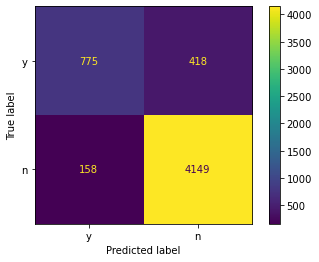

In [103]:
logreg = LogisticRegression(C=20,solver='liblinear', random_state=7)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
filename = 'predict_ship_maintenance_new.sav'
pickle.dump(logreg, open(filename, 'wb'))
labels=['y','n']
cm=confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
print(classification_report(y_test, y_pred))

In [75]:
#Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.
rfe = RFE(logreg, n_features_to_select=3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

selected = fit.support_

#get the top-3 feature_names
feature_names = X.columns
print(feature_names.to_numpy()[selected])

Num Features: 3
Selected Features: [False  True False False False False False False False False False False
 False  True False False False False False False  True False False False]
Feature Ranking: [14  1  4  5  6 13 21 10 15 19  2 16  9  1 11 12 18  3 22  8  1 20  7 17]
['op_setting_2' 'sensor_11' 'sensor_18']


In [119]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

#read in data file to predict
df = pd.read_csv('engFail.csv')

#view data file content
df.head()

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,25.0028,0.6213,60,462.54,536.82,1268.11,1044.44,7.05,9.02,176.17,...,164.37,2028.44,7881.78,10.8878,0.02,307,1915,84.93,14.43,8.5087
1,41.9999,0.8411,100,445.00,550.23,1355.45,1118.18,3.91,5.71,138.68,...,130.97,2388.13,8093.43,9.3504,0.02,332,2212,100.00,10.66,6.3236
2,0.0010,0.0000,100,518.67,642.85,1597.27,1409.29,14.62,21.61,553.88,...,521.25,2388.07,8141.44,8.4899,0.03,394,2388,100.00,38.83,23.2633
3,42.0007,0.8400,100,445.00,550.00,1355.39,1121.59,3.91,5.72,138.94,...,130.49,2388.11,8090.79,9.3576,0.02,331,2212,100.00,10.59,6.4056
4,10.0039,0.2500,100,489.05,605.22,1503.74,1316.07,10.52,15.50,394.29,...,371.52,2388.20,8139.39,8.7085,0.03,372,2319,100.00,28.49,17.0793


In [123]:
filename

'predict_ship_maintenance_new.sav'

In [121]:
X = df

In [122]:
#Use loaded model
y_pred = loaded_model.predict(X)
#create new column and append predicted data for each engine
df['y'] = y_pred
#Only show engines that are predicted to require maintenance
df

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,y
0,25.0028,0.6213,60,462.54,536.82,1268.11,1044.44,7.05,9.02,176.17,...,2028.44,7881.78,10.8878,0.02,307,1915,84.93,14.43,8.5087,y
1,41.9999,0.8411,100,445.00,550.23,1355.45,1118.18,3.91,5.71,138.68,...,2388.13,8093.43,9.3504,0.02,332,2212,100.00,10.66,6.3236,y
2,0.0010,0.0000,100,518.67,642.85,1597.27,1409.29,14.62,21.61,553.88,...,2388.07,8141.44,8.4899,0.03,394,2388,100.00,38.83,23.2633,y
3,42.0007,0.8400,100,445.00,550.00,1355.39,1121.59,3.91,5.72,138.94,...,2388.11,8090.79,9.3576,0.02,331,2212,100.00,10.59,6.4056,y
4,10.0039,0.2500,100,489.05,605.22,1503.74,1316.07,10.52,15.50,394.29,...,2388.20,8139.39,8.7085,0.03,372,2319,100.00,28.49,17.0793,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4629,20.0023,0.7006,100,491.19,608.50,1493.12,1275.53,9.35,13.66,332.92,...,2388.62,8116.20,9.2814,0.03,368,2324,100.00,24.15,14.5627,y
4630,10.0071,0.2500,100,489.05,605.48,1512.54,1328.18,10.52,15.50,393.05,...,2388.36,8183.17,8.7501,0.03,372,2319,100.00,28.27,16.9605,y
4631,10.0071,0.2509,100,489.05,606.13,1520.19,1321.81,10.52,15.50,392.84,...,2388.34,8188.00,8.7634,0.03,372,2319,100.00,28.24,17.0355,y
4632,0.0000,0.0000,100,518.67,643.60,1602.83,1434.53,14.62,21.61,551.89,...,2388.17,8197.21,8.4935,0.03,397,2388,100.00,38.61,23.0799,y


In [110]:
pos = df[df['y']=='y']

In [112]:
pos.to_csv("asdsa.csv")

In [ ]:

for i in test:
    # print(i)
    df = {}
    cat = ['op_setting_1','op_setting_2','op_setting_3','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7','sensor_8','sensor_9','sensor_10','sensor_11','sensor_12','sensor_13','sensor_14','sensor_15','sensor_16','sensor_17','sensor_18','sensor_19','sensor_20','sensor_21']
    eng = i
    for i in range(0,len(cat)):
        df[cat[i]] = [eng[i]]
    df = pd.DataFrame(df)  
    print(df)
#     X = preprocess_data(df)
#     y_pred = loaded_model.predict(X)
#     print(y_pred[0])
#     if y_pred[0] == 'y':
#         print(y_pred) 

In [113]:
df

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL,y
0,25.0074,0.6200,60,462.54,536.84,1256.52,1043.97,7.05,9.02,175.29,...,7875.47,10.8850,0.02,306,1915,84.93,14.35,8.4712,339,n
1,35.0072,0.8413,100,449.44,555.44,1364.42,1128.75,5.48,8.00,194.71,...,8073.12,9.2527,0.02,334,2223,100.00,14.88,8.9928,338,n
2,25.0053,0.6215,60,462.54,536.42,1265.94,1047.23,7.05,9.03,175.29,...,7884.88,10.9054,0.02,307,1915,84.93,14.21,8.5107,337,n
3,42.0045,0.8407,100,445.00,549.41,1355.52,1115.81,3.91,5.72,138.92,...,8093.08,9.3434,0.02,331,2212,100.00,10.63,6.4578,336,n
4,35.0046,0.8400,100,449.44,555.21,1361.04,1123.63,5.48,8.00,194.91,...,8078.18,9.3287,0.02,334,2223,100.00,14.95,9.0279,335,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,42.0060,0.8400,100,445.00,549.23,1354.87,1119.64,3.91,5.71,138.10,...,8084.10,9.3232,0.02,331,2212,100.00,10.83,6.3969,194,n
27495,25.0061,0.6217,60,462.54,536.67,1260.99,1041.58,7.05,9.03,176.43,...,7875.73,10.8750,0.02,307,1915,84.93,14.14,8.6183,193,n
27496,20.0078,0.7000,100,491.19,607.10,1489.42,1250.08,9.35,13.65,335.04,...,8062.84,9.2015,0.02,363,2324,100.00,24.62,14.7773,192,n
27497,10.0001,0.2519,100,489.05,604.76,1492.58,1303.08,10.52,15.49,394.78,...,8132.62,8.6224,0.03,369,2319,100.00,28.55,17.2090,191,n


In [ ]:
test= [
[42.0034,0.84,100,445,549.36,1342.05,1124.56,3.91,5.71,138.59,2211.83,8311.68,1.02,41.93,130.98,2387.9,8077.78,9.3092,0.02,329,2212,100,10.69,6.3956],
[42.0017,0.84,100,445,548.83,1351.93,1116.28,3.91,5.71,138.2,2211.79,8312.85,1.02,41.92,130.3,2387.89,8077.82,9.345,0.02,331,2212,100,10.55,6.3775],
[0.0028,0.0019,100,518.67,642.35,1583.74,1400.44,14.62,21.61,554.46,2388.07,9052.16,1.3,47.43,521.83,2388.04,8129.19,8.384,0.03,392,2388,100,38.85,23.3483],
[42.0047,0.84,100,445,549.69,1354.36,1125.55,3.91,5.72,139.05,2211.81,8310.83,1.02,41.83,131.15,2387.82,8082.04,9.3852,0.02,330,2212,100,10.56,6.4871],
[10.0058,0.2506,100,489.05,604.72,1496.65,1310.52,10.52,15.49,394.71,2318.91,8760.8,1.26,45.25,371.57,2388.1,8121.73,8.6074,0.03,370,2319,100,28.78,17.1987],
[9.9988,0.2514,100,489.05,604.68,1507.04,1308.53,10.52,15.49,394.32,2318.87,8773.51,1.26,45.36,372.03,2388.05,8121.25,8.6145,0.03,368,2319,100,28.61,17.1582],
[9.9981,0.25,100,489.05,604.68,1506.31,1314.41,10.52,15.49,394.62,2318.84,8773.33,1.26,45.33,371.92,2388.1,8122.12,8.6176,0.03,368,2319,100,28.68,17.1937],
[24.9999,0.62,60,462.54,536.91,1259.69,1045.17,7.05,9.02,175.84,1915.23,8003.08,0.94,36.63,164.61,2028.14,7869.28,10.888,0.02,306,1915,84.93,14.5,8.6003],
[10.0055,0.2503,100,489.05,604.6,1496.49,1302.18,10.52,15.49,395.16,2318.9,8771.61,1.26,45.21,372.05,2388.12,8119.62,8.664,0.03,367,2319,100,28.59,17.2014],
[20.0011,0.7,100,491.19,607.39,1480.46,1251.77,9.35,13.65,335.1,2323.87,8714.31,1.08,44.2,315.36,2388.01,8054.81,9.2212,0.02,365,2324,100,24.57,14.8325],
[20.0051,0.702,100,491.19,607.23,1477.53,1242.62,9.35,13.65,334.85,2323.86,8715.58,1.08,44.36,315.22,2388,8061.12,9.1821,0.02,365,2324,100,24.67,14.7229],
[19.9993,0.7008,100,491.19,607.04,1472.94,1242.52,9.35,13.65,335.51,2323.94,8716.94,1.07,44.31,315.06,2388.01,8054.68,9.214,0.02,364,2324,100,24.52,14.7924],
[20.0003,0.7,100,491.19,607.52,1480.3,1249.51,9.35,13.66,334.91,2323.97,8715.58,1.08,44.19,314.93,2388.05,8055.69,9.218,0.02,365,2324,100,24.44,14.7854],
[35.0013,0.84,100,449.44,555.29,1370.11,1123.59,5.48,8,194.92,2222.86,8343.96,1.02,41.97,183.59,2387.9,8060.55,9.3058,0.02,334,2223,100,14.85,8.8189],
[35.0041,0.84,100,449.44,555.52,1365.43,1123.32,5.48,8,194.26,2222.85,8347.41,1.03,41.75,183.28,2387.86,8059.07,9.2984,0.02,333,2223,100,15.18,8.8985],
[25.0001,0.62,60,462.54,536.47,1259.86,1040.31,7.05,9.02,175.73,1915.24,8002.62,0.94,36.64,164.81,2028.11,7870.21,10.8653,0.02,308,1915,84.93,14.39,8.7443],
[41.9983,0.8415,100,445,549.66,1350.88,1126.19,3.91,5.71,138.92,2211.8,8311.25,1.02,42.02,130.29,2387.87,8074.7,9.3414,0.02,331,2212,100,10.52,6.3825],
[20.0032,0.7011,100,491.19,607.12,1474.57,1251.59,9.35,13.65,335.12,2323.93,8714.49,1.08,44.28,315,2388.03,8053.06,9.1821,0.02,364,2324,100,24.6,14.6878],
[24.9998,0.62,60,462.54,537.34,1267.53,1047.09,7.05,9.03,175.24,1915.2,7999.86,0.94,36.56,164.56,2028.16,7867.89,10.879,0.02,306,1915,84.93,14.42,8.6004],
[35.0064,0.84,100,449.44,555.56,1364.48,1123.97,5.48,8,195.38,2222.82,8346.89,1.02,41.93,183.31,2387.92,8058.61,9.2794,0.02,335,2223,100,14.86,9.0179],
[0.0018,0,100,518.67,642.13,1585.85,1405.12,14.62,21.61,553.87,2388.07,9049.96,1.3,47.41,521.85,2388.06,8124.49,8.4228,0.03,392,2388,100,38.92,23.2894],
[10.0012,0.2518,100,489.05,604.17,1498.06,1306.78,10.52,15.49,395.02,2318.9,8775.87,1.26,45.36,372.02,2388.06,8124.13,8.6396,0.03,370,2319,100,28.58,17.1737],
[35.006,0.8416,100,449.44,555.41,1360.37,1125.47,5.48,8,194.84,2222.9,8342.98,1.02,41.75,183.26,2387.89,8062.7,9.2657,0.02,335,2223,100,14.83,8.878],
[24.9983,0.62,60,462.54,536.74,1257.04,1048.75,7.05,9.02,175.32,1915.19,8005.5,0.94,36.51,164.48,2028.11,7869.87,10.8978,0.02,304,1915,84.93,14.47,8.5688],
[20.0037,0.7,100,491.19,607.48,1483.17,1240.19,9.35,13.65,334.54,2323.91,8707.74,1.08,44.28,315.22,2388.02,8055.81,9.2175,0.02,365,2324,100,24.29,14.7706],
[0.0008,0.0008,100,518.67,642.25,1583.26,1401.64,14.62,21.61,553.33,2388.04,9054.45,1.3,47.37,521.67,2388.12,8130.16,8.4032,0.03,391,2388,100,38.96,23.4726],
[0.0003,0,100,518.67,642.44,1579.22,1403.2,14.62,21.61,553.73,2388.07,9048.32,1.3,47.38,521.88,2388.04,8134.98,8.4076,0.03,392,2388,100,39.01,23.4167],
[20.0058,0.701,100,491.19,607.18,1479.04,1250.67,9.35,13.65,334.41,2323.88,8712.91,1.08,44.17,315.06,2388,8051.7,9.167,0.02,363,2324,100,24.59,14.7882],
[20.006,0.7003,100,491.19,608.03,1483.27,1241.04,9.35,13.65,335.38,2323.94,8719.38,1.08,44.27,315.01,2388.06,8053.55,9.2084,0.02,364,2324,100,24.46,14.7542],
[0.0022,0,100,518.67,642.85,1585.61,1399.07,14.62,21.61,553.76,2388.07,9042.66,1.3,47.41,521.7,2388.11,8135.23,8.418,0.03,394,2388,100,38.91,23.4381],
[35.0079,0.8414,100,449.44,555.86,1361.08,1123.33,5.48,8,194.34,2222.91,8346.15,1.02,41.75,183.3,2387.95,8061.09,9.3525,0.02,333,2223,100,15,8.9148],
[24.9989,0.6202,60,462.54,536.42,1259.16,1040.76,7.05,9.03,175.31,1915.23,8010.12,0.94,36.57,164.54,2028.17,7868.07,10.9095,0.02,305,1915,84.93,14.26,8.5601],
[42.0055,0.84,100,445,549.55,1348.14,1121.76,3.91,5.71,138.87,2211.76,8311.11,1.02,41.97,130.58,2387.85,8075.81,9.3658,0.02,330,2212,100,10.57,6.3782],
[34.9981,0.84,100,449.44,556,1366.81,1121.52,5.48,8,194.24,2222.77,8342.84,1.02,41.8,182.91,2387.9,8068.39,9.2959,0.02,334,2223,100,14.85,8.8278],
[42.001,0.84,100,445,549.38,1357.56,1130.6,3.91,5.72,139.81,2211.79,8313.65,1.02,41.94,130.03,2387.84,8076.22,9.3496,0.02,330,2212,100,10.75,6.296],
[42.0051,0.841,100,445,549.62,1356.68,1132.08,3.91,5.71,137.5,2211.73,8314.09,1.02,41.98,129.98,2387.83,8079.93,9.3449,0.02,330,2212,100,10.71,6.3342],
[41.9989,0.8416,100,445,548.33,1349.93,1124.65,3.91,5.71,138.42,2211.8,8307.22,1.02,41.85,130.31,2387.87,8079.33,9.3616,0.02,331,2212,100,10.55,6.2436],
[9.9984,0.2509,100,489.05,604.77,1493.32,1303.78,10.52,15.49,394.06,2318.97,8774.31,1.26,45.42,371.6,2388.11,8122.82,8.6335,0.03,369,2319,100,28.52,17.0826],
[0.0024,0.0006,100,518.67,642.74,1586.22,1409.44,14.62,21.61,553.53,2388.07,9051.86,1.3,47.36,521.6,2388.01,8128.47,8.3873,0.03,392,2388,100,38.86,23.3677]
]

In [ ]:
test = [[0.23812244,0.297329377,1,0.597936745,0.638113659,0.708671414,0.697440358,0.617180205,0.616687578,0.591330627,0.853328549,0.646041063,0.846153846,0.783152627,0.59193584,0.994155594,0.668468762,0.17464339,1,0.70212766,0.854122622,1,0.609797297,0.60757084]]


In [ ]:
from sklearn.model_selection import cross_val_score
param_grid = {'C': [0.01, 0.1, 1, 10, 20]}

max_score = 0
bestparam = 0
for param in param_grid['C']:
    logreg = LogisticRegression(C=param, random_state=7, solver='liblinear')
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print("Current Param C :",param)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    
    labels=['y','n']
    cm=confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    print(classification_report(y_test, y_pred))

    #Cross validation
    scores = cross_val_score(logreg, X_train,y_train, cv=5)
    if scores.mean() > max_score:
        max_score = scores.mean()
        bestparam = param
    print("cross validation avg")
    print( scores.mean(),"accuracy with a standard deviation of", scores.std())

In [ ]:
print('Best score:', max_score)
print('Best param:',bestparam)